# Exploring Tempo and Genre

In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [2]:
# Create 2000-2019 dataframe
spotify_2000_2019_df = pd.read_csv("Resources/spotify_from_2000-2019.csv")

# Display sample data
spotify_2000_2019_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values,x_loc,y_loc,x_label,y_label,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

# Tempo

The r-squared is: 0.00020416023921502078


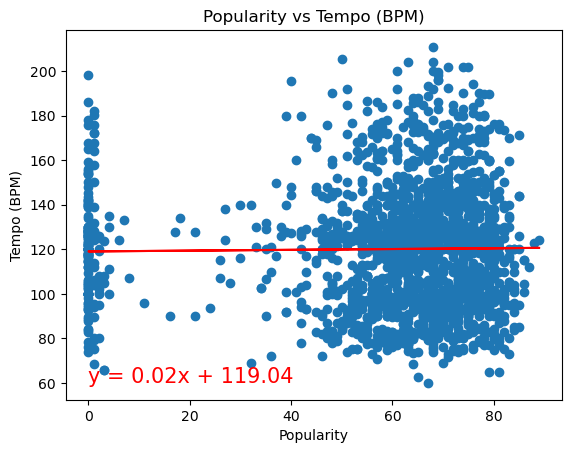

In [6]:
linear_reg_plot(spotify_2000_2019_df['popularity'],spotify_2000_2019_df['tempo'],0,60,"Popularity","Tempo (BPM)", "Popularity vs Tempo (BPM)")

# Genre

In [18]:
#initialize dictionary
genres_dict = {}

#Creating dictionary of genres related to number of times seen
#iterate through rows looking at genre
for index,row in spotify_2000_2019_df.iterrows():
    #look at genre
    genre = row['genre']
    
    #If the value dictionary contains the genre, increase the number
    if genre in genres_dict.keys():
        genres_dict[genre]=genres_dict[genre]+1
    
    #else add new dictionary entry
    else:
        genres_dict[genre] = 0

#create list of genre labels
genre_labels = genres_dict.keys()

#create list of values
values = []

for i in genres_dict.values():
    values.append(i)

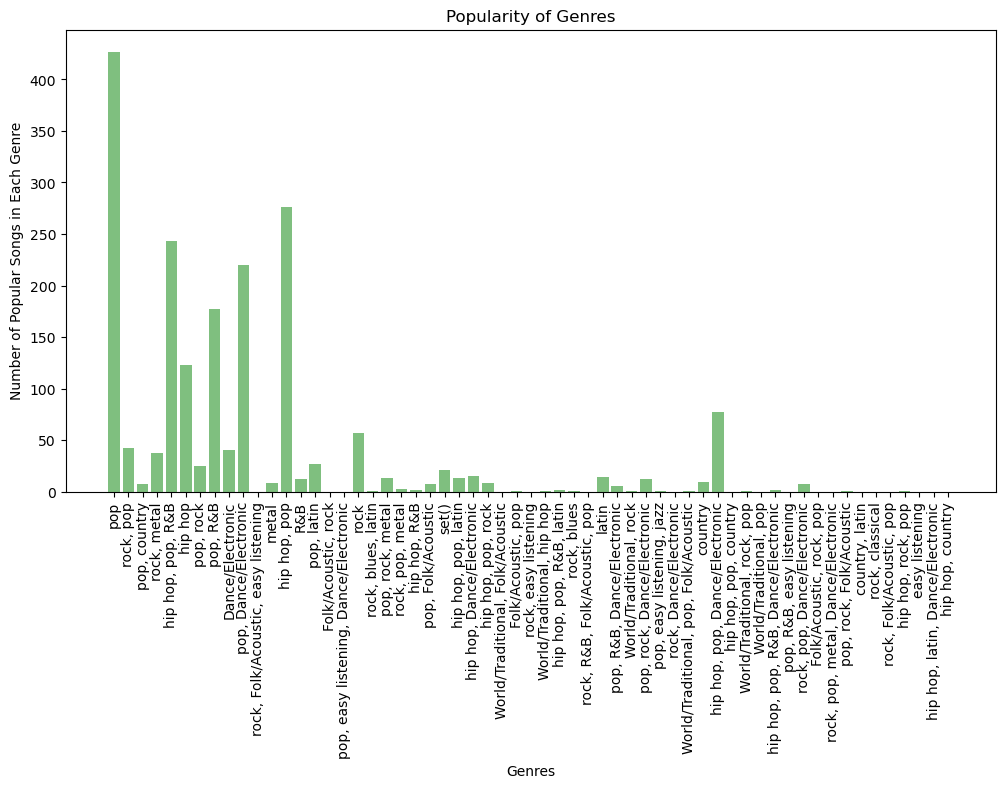

In [19]:
# Create an array that contains the number of users each language has
x_axis = np.arange(len(values))

plt.figure(figsize=(12,6))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="center" to ensure our bars line up with our tick marks
plt.bar(x_axis, values, color='green', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genre_labels, rotation = 90)

# Give our chart some labels and a title

plt.title("Popularity of Genres")
plt.xlabel("Genres")
plt.ylabel("Number of Popular Songs in Each Genre")
plt.show()

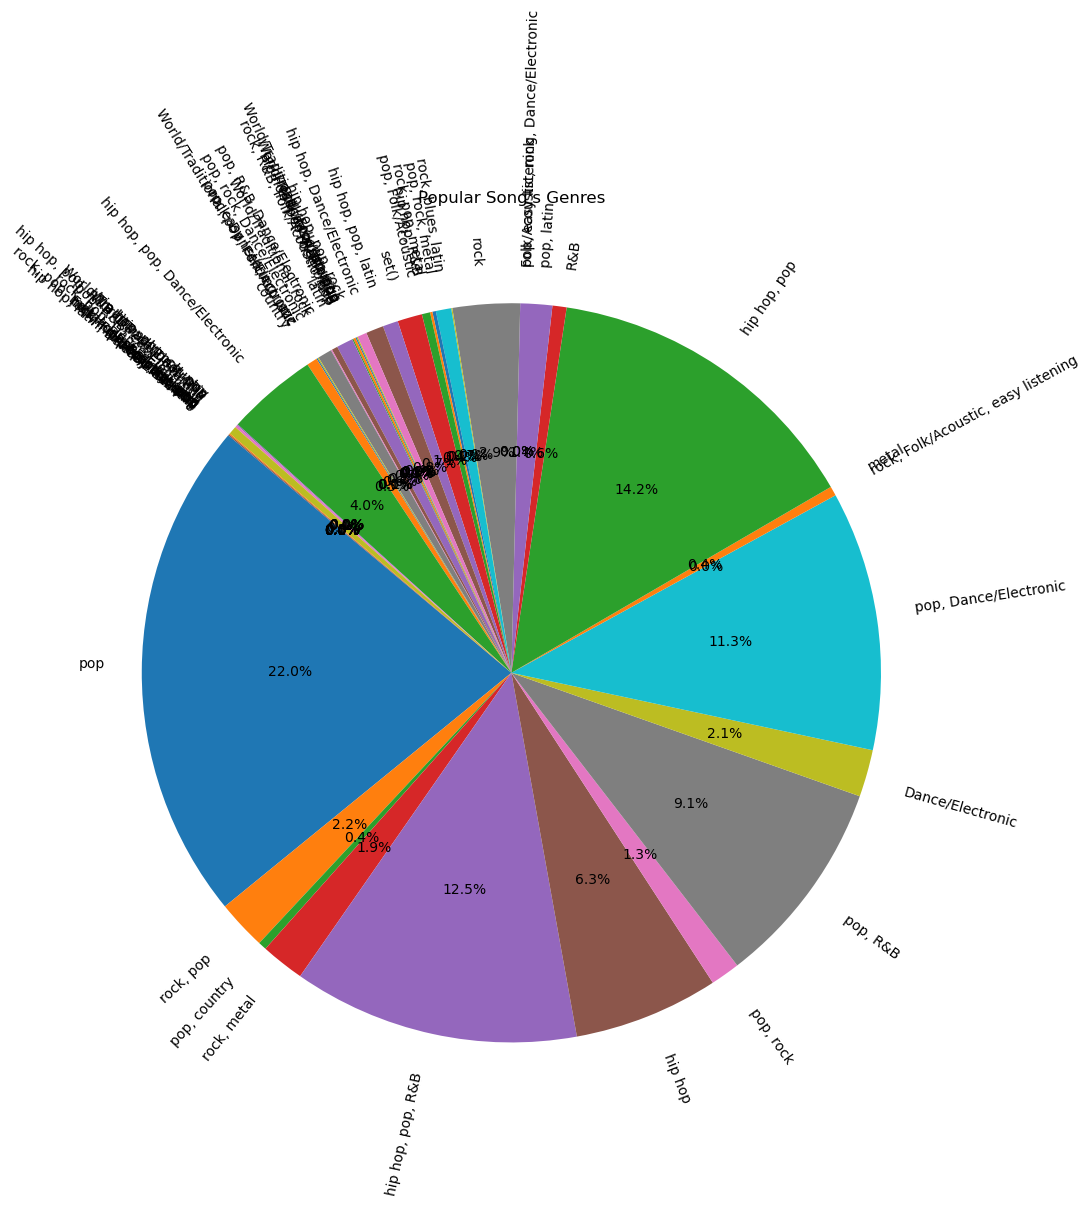

In [22]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(12,12))
plt.pie(values, labels=genre_labels,autopct="%1.1f%%",startangle=140, rotatelabels = True)
plt.title("Popular Song's Genres")
plt.show()